In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction/Sample_Submission.csv
/kaggle/input/loan-approval-prediction/Training Dataset.csv
/kaggle/input/loan-approval-prediction/Test Dataset.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [3]:
df=pd.read_csv("/kaggle/input/loan-approval-prediction/Training Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Peak at the Data**

In [4]:
 df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Dimensions of Dataset**

In [5]:
df.shape

(614, 13)

# **Information of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Statistical Summary**

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Missing values**

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

df.Credit_History=df.Credit_History.fillna(df.Credit_History.mean())

df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)

df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)

df.Dependents.fillna(df.Dependents.value_counts().idxmax(), inplace=True)

df.Self_Employed.fillna(df.Self_Employed.value_counts().idxmax(), inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Duplicate Entries**

In [11]:
df.duplicated().sum()

0

# **unwanted columns**

In [12]:
df.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# **Outliers**

In [13]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [14]:
df.ApplicantIncome=df.ApplicantIncome.clip(lower=df.ApplicantIncome.quantile(0.05),upper=df.ApplicantIncome.quantile(0.95))

df.CoapplicantIncome=df.CoapplicantIncome.clip(lower=df.CoapplicantIncome.quantile(0.05),upper=df.CoapplicantIncome.quantile(0.95))

df.Loan_Amount_Term=df.Loan_Amount_Term.clip(lower=df.Loan_Amount_Term.quantile(0.14),upper=df.Loan_Amount_Term.quantile(0.86))

df.LoanAmount=df.LoanAmount.clip(lower=df.LoanAmount.quantile(0.05),upper=df.LoanAmount.quantile(0.95))

df.Credit_History=df.Credit_History.clip(lower=df.Credit_History.quantile(0.05),upper=df.Credit_History.quantile(0.95))

df.ApplicantIncome=df.ApplicantIncome.clip(lower=df.ApplicantIncome.quantile(0.10),upper=df.ApplicantIncome.quantile(0.90))

In [15]:
df.skew()

ApplicantIncome      1.017728
CoapplicantIncome    0.845204
LoanAmount           1.042174
Loan_Amount_Term    -2.059922
Credit_History      -1.963600
dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


## **Analyzing Features**

# ***Univariate Analysis***

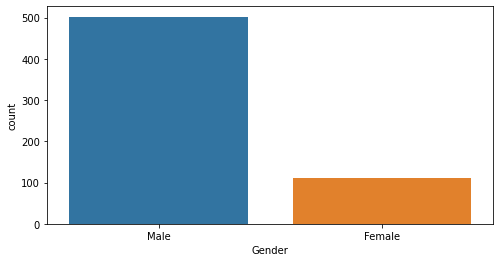

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(df.Gender)
plt.show()

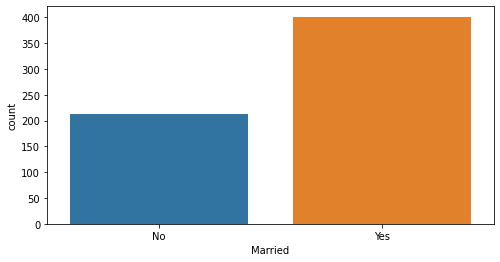

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(df.Married)
plt.show()

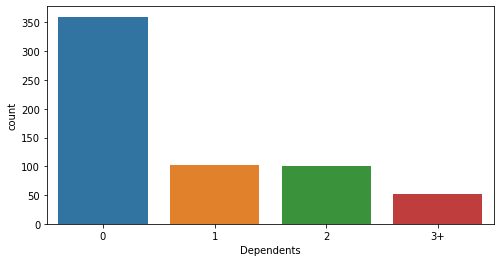

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(df.Dependents)
plt.show()

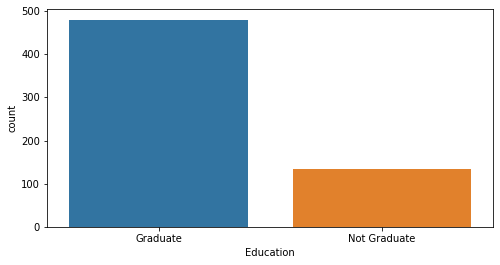

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(df.Education)
plt.show()

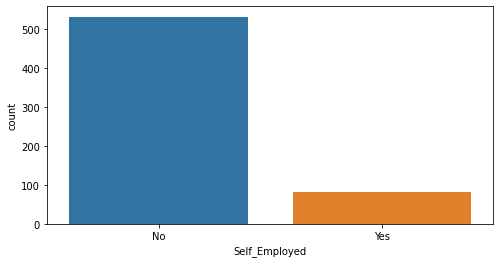

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(df.Self_Employed)
plt.show()

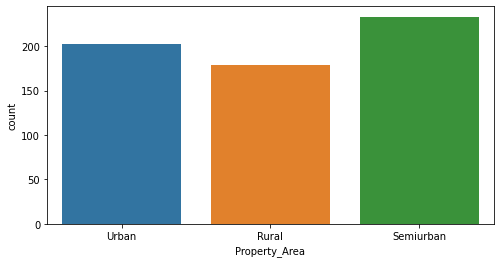

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(df.Property_Area)
plt.show()

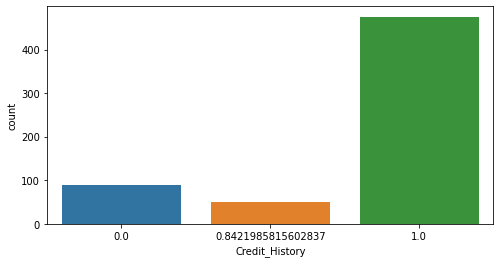

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(df.Credit_History)
plt.show()

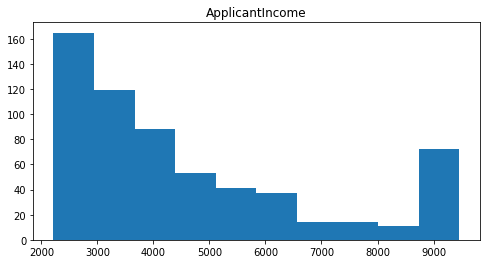

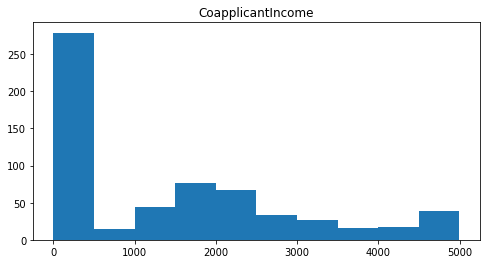

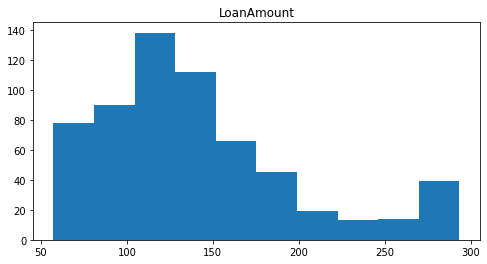

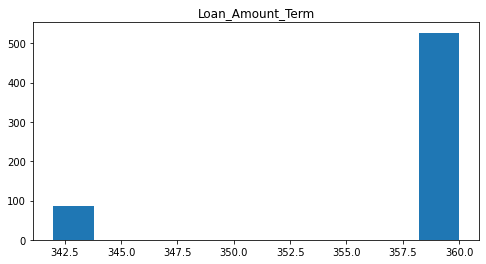

In [24]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [25]:
df.Loan_Status.replace('N',0,inplace=True)
df.Loan_Status.replace('Y',1,inplace=True)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1


# ***Bivariate Analysis***

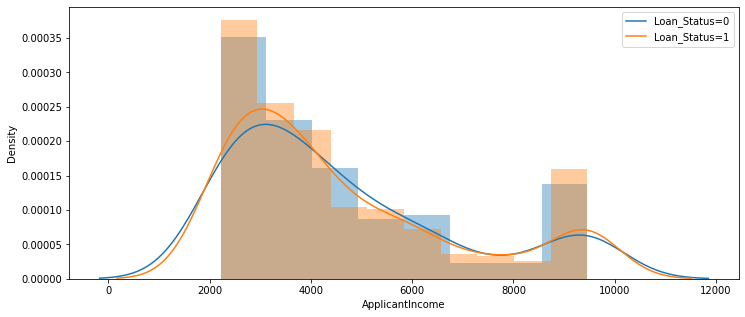

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(df['ApplicantIncome'][df.Loan_Status==0])
sns.distplot(df['ApplicantIncome'][df.Loan_Status==1])
plt.legend(['Loan_Status=0','Loan_Status=1'])
plt.show()

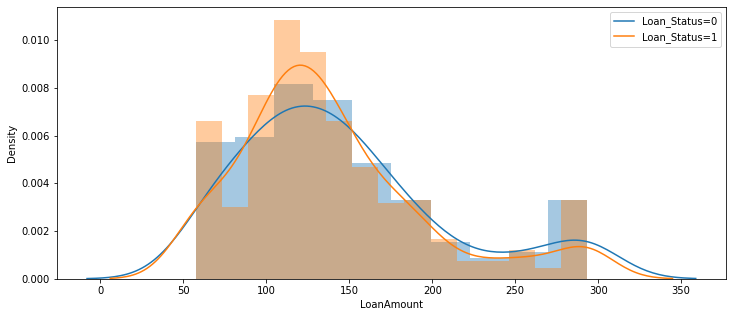

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df['LoanAmount'][df.Loan_Status==0])
sns.distplot(df['LoanAmount'][df.Loan_Status==1])
plt.legend(['Loan_Status=0','Loan_Status=1'])
plt.show()

In [29]:
pivot = pd.crosstab(df.Married,df.Loan_Status,margins=True)
pivot

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [30]:
ratio = pivot[1]/pivot['All']
ratio

Married
No     0.629108
Yes    0.718204
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Married'>

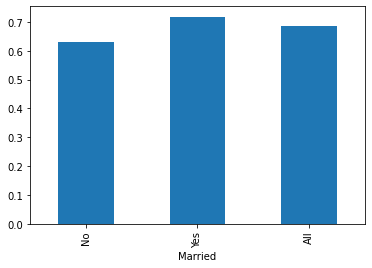

In [31]:
ratio.plot(kind='bar')

In [32]:
pivot1 = pd.crosstab(df.Gender,df.Loan_Status,margins=True)
pivot1

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [33]:
ratio1 = pivot1[1]/pivot1['All']
ratio1

Gender
Female    0.669643
Male      0.691235
All       0.687296
dtype: float64

<AxesSubplot:xlabel='Gender'>

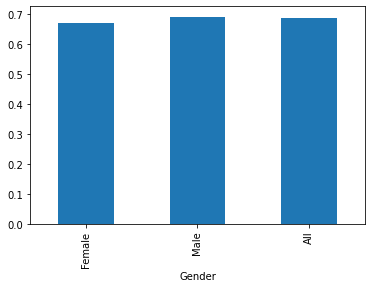

In [34]:
ratio1.plot(kind='bar')

In [35]:
pivot2 = pd.crosstab(df.Dependents,df.Loan_Status,margins=True)
pivot2

Loan_Status,0,1,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


In [36]:
ratio2 = pivot2[1]/pivot2['All']
ratio2

Dependents
0      0.686111
1      0.647059
2      0.752475
3+     0.647059
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Dependents'>

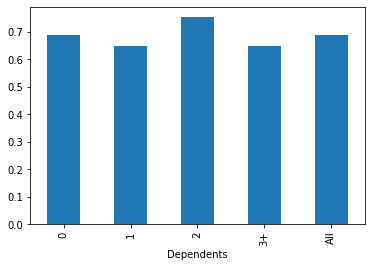

In [37]:
ratio2.plot(kind='bar')

In [38]:
pivot3 = pd.crosstab(df.Education,df.Loan_Status,margins=True)
pivot3

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [39]:
ratio3 = pivot3[1]/pivot3['All']
ratio3

Education
Graduate        0.708333
Not Graduate    0.611940
All             0.687296
dtype: float64

<AxesSubplot:xlabel='Education'>

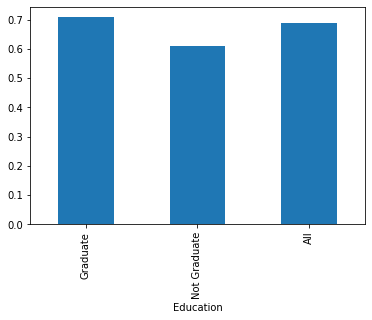

In [40]:
ratio3.plot(kind='bar')

In [41]:
pivot4 = pd.crosstab(df.Self_Employed,df.Loan_Status,margins=True)
pivot4


Loan_Status,0,1,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


In [42]:
ratio4 = pivot4[1]/pivot4['All']
ratio4

Self_Employed
No     0.687970
Yes    0.682927
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Self_Employed'>

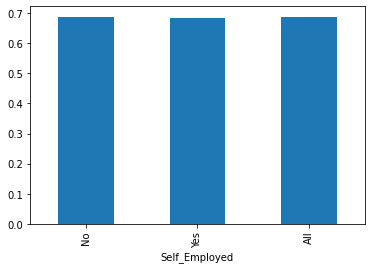

In [43]:
ratio4.plot(kind='bar')

In [44]:
pivot5= pd.crosstab(df.Credit_History,df.Loan_Status,margins=True)
pivot5

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


In [45]:
ratio5= pivot5[1]/pivot5['All']
ratio5

Credit_History
0.0                   0.078652
0.8421985815602837    0.740000
1.0                   0.795789
All                   0.687296
dtype: float64

<AxesSubplot:xlabel='Credit_History'>

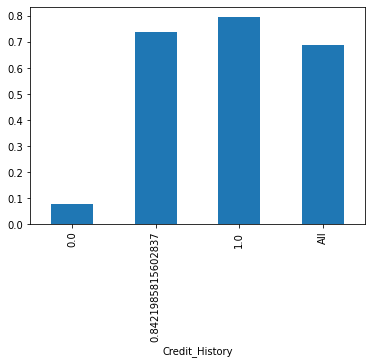

In [46]:
ratio5.plot(kind='bar')

In [47]:
pivot6= pd.crosstab(df.Property_Area,df.Loan_Status,margins=True)
pivot6

Loan_Status,0,1,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [48]:
ratio6= pivot6[1]/pivot6['All']
ratio6

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
All          0.687296
dtype: float64

<AxesSubplot:xlabel='Property_Area'>

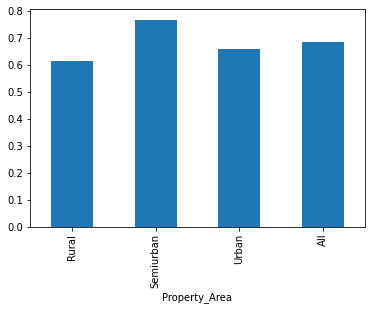

In [49]:
ratio6.plot(kind='bar')

# **Label Encoding**

In [50]:
from sklearn.preprocessing import LabelEncoder
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])
df['Self_Employed']=LabelEncoder().fit_transform(df['Self_Employed'])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Property_Area']=LabelEncoder().fit_transform(df['Property_Area'])

# **Correlation Matrix**

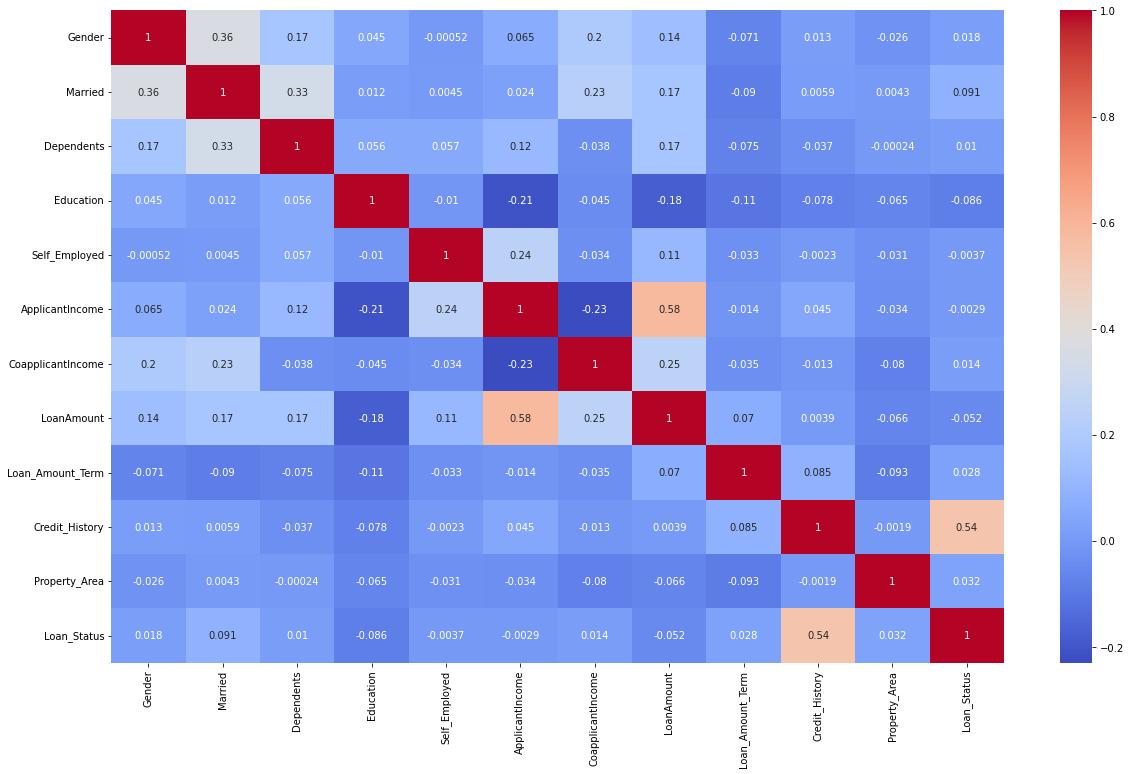

In [51]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

# **Train the Model**

In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [53]:
df2=df
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [54]:
col=['Loan_ID','Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area']
df2=df2.drop(columns=col,axis=1)
df2

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0,0,5849.0,146.412162,1.0,1
1,1,0,0,4583.0,128.000000,1.0,0
2,0,0,1,3000.0,66.000000,1.0,1
3,0,1,0,2583.0,120.000000,1.0,1
4,0,0,0,6000.0,141.000000,1.0,1
...,...,...,...,...,...,...,...
609,0,0,0,2900.0,71.000000,1.0,1
610,3,0,0,4106.0,57.300000,1.0,1
611,1,0,0,8072.0,253.000000,1.0,1
612,2,0,0,7583.0,187.000000,1.0,1


In [55]:
x=df2[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df2[['Loan_Status']]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

# **DecisionTree**

In [57]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pre1 = model.predict(x_test)
y_pre1

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [60]:
from sklearn.model_selection import cross_val_score
print(ac(y_test,y_pre1)*100)
sco1=(cross_val_score(model,x,y,cv=5))
print(np.mean(sco1)*100)

71.42857142857143
70.19325603092096


# **Implementing Confusion Matrix**

Text(0.5, 1.0, 'Output Confusion Matrix')

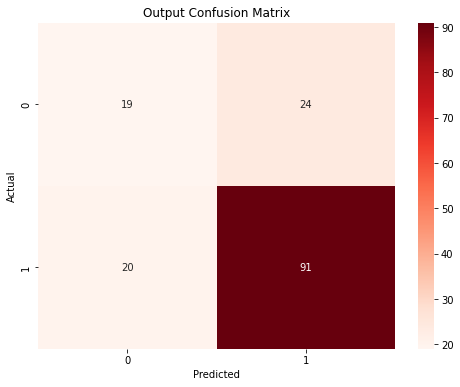

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre1)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

# **DecisionTree Prediction With New Input**

In [62]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output1=model.predict(newinput)
output1

array([1])

# **Naive Bayes**

In [63]:
from sklearn.naive_bayes import GaussianNB  
classifier1 = GaussianNB()  
classifier1.fit(x_train, y_train)  

GaussianNB()

In [64]:
y_pred3= classifier1.predict(x_test)  

In [65]:
print(ac(y_test,y_pred3)*100)
sco3=(cross_val_score(classifier1,x,y,cv=5))
print(np.mean(sco3)*100)

81.16883116883116
80.9462881514061


# **Prediction**

In [66]:
newinput1=[[0,0,0,5849.0,146.412162,1.0]]
output11=classifier1.predict(newinput1)
output11

array([1])